# 台灣證券交易所
- NCCU PyDay 2022: https://www.facebook.com/groups/pythontw/posts/10162007038723438/
- Author: TENG-LIN YU
- Email: tlyu0419@gmail.com
- Github: https://github.com/TLYu0419/Stock-Prediction-Using-Facebook-Sentiment-with-Python

In [32]:
import time
import requests
import pandas as pd
import datetime
import re
import numpy as np
import seaborn as sns

In [33]:
df = []
rs = requests.Session()
headers={'Referer': 'https://www.twse.com.tw/zh/',
         'headers':'User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36 Edg/100.0.1185.39'}

start_date = '2020-12-01'
end_date = '2022-04-01'

for date in pd.date_range(start_date, end_date, freq='MS'):
    url = 'https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date={}'.format(date.strftime('%Y%m%d'))
    print(url)
    resp = rs.get(url, headers=headers)
    ndf = pd.DataFrame(resp.json()['data'],           
                       columns=resp.json()['fields'])
    ndf['title'] = resp.json()['title']
    time.sleep(3)
    df.append(ndf)
df = pd.concat(df, ignore_index=True)
df

https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20201201
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20210101
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20210201
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20210301
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20210401
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20210501
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20210601
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20210701
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20210801
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20210901
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20211001
https://www.twse.com.tw/en/indicesReport/MI_5MINS_HIST?response=json&date=20211101
http

,Date,Opening Index,Highest Index,Lowest Index,Closing Index,title
0,2020/12/01,"13,810.55","13,885.67","13,749.71","13,885.67",2020/12 TAIEX Total Index Historical Data
1,2020/12/02,"13,970.51","13,995.70","13,894.70","13,989.14",2020/12 TAIEX Total Index Historical Data
2,2020/12/03,"13,988.49","14,049.58","13,940.07","13,977.09",2020/12 TAIEX Total Index Historical Data
3,2020/12/04,"14,010.17","14,149.56","14,010.17","14,132.44",2020/12 TAIEX Total Index Historical Data
4,2020/12/07,"14,230.00","14,306.87","14,142.02","14,256.60",2020/12 TAIEX Total Index Historical Data
...,...,...,...,...,...,...
332,2022/04/18,"16,958.66","16,999.36","16,845.51","16,898.87",2022/04 TAIEX Total Index Historical Data
333,2022/04/19,"16,926.34","17,106.26","16,926.34","16,993.40",2022/04 TAIEX Total Index Historical Data
334,2022/04/20,"17,057.13","17,148.88","16,983.55","17,148.88",2022/04 TAIEX Total Index Historical Data
335,2022/04/21,"17,159.88","17,213.66","17,106.37","17,127.95",2022/04 TAIEX Total Index Historical Data


In [34]:
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y/%m/%d'))
df['Opening Index'] = df['Opening Index'].apply(lambda x: float(re.sub(',', '', x)))
df['Highest Index'] = df['Highest Index'].apply(lambda x: float(re.sub(',', '', x)))
df['Lowest Index'] = df['Lowest Index'].apply(lambda x: float(re.sub(',', '', x)))
df['Closing Index'] = df['Closing Index'].apply(lambda x: float(re.sub(',', '', x)))
df.columns = [col.upper() for col in df.columns]
df.columns = [re.sub(' ', '_', col) for col in df.columns]
df

,DATE,OPENING_INDEX,HIGHEST_INDEX,LOWEST_INDEX,CLOSING_INDEX,TITLE
0,2020-12-01,13810.55,13885.67,13749.71,13885.67,2020/12 TAIEX Total Index Historical Data
1,2020-12-02,13970.51,13995.70,13894.70,13989.14,2020/12 TAIEX Total Index Historical Data
2,2020-12-03,13988.49,14049.58,13940.07,13977.09,2020/12 TAIEX Total Index Historical Data
3,2020-12-04,14010.17,14149.56,14010.17,14132.44,2020/12 TAIEX Total Index Historical Data
4,2020-12-07,14230.00,14306.87,14142.02,14256.60,2020/12 TAIEX Total Index Historical Data
...,...,...,...,...,...,...
332,2022-04-18,16958.66,16999.36,16845.51,16898.87,2022/04 TAIEX Total Index Historical Data
333,2022-04-19,16926.34,17106.26,16926.34,16993.40,2022/04 TAIEX Total Index Historical Data
334,2022-04-20,17057.13,17148.88,16983.55,17148.88,2022/04 TAIEX Total Index Historical Data
335,2022-04-21,17159.88,17213.66,17106.37,17127.95,2022/04 TAIEX Total Index Historical Data


In [35]:
# EDA 繪製股價變化圖

## 活動
- 如何計算連續的休假天數?

In [36]:
stock_price = pd.DataFrame(pd.date_range('2020-12-01', '2022-04-22', freq='D'), columns=['DATE'])
stock_price = pd.merge(stock_price, df[['DATE', 'CLOSING_INDEX']], how='left', on='DATE')
stock_price = stock_price.loc[stock_price['CLOSING_INDEX'].notnull()]
stock_price['LAST_DATE'] = stock_price['DATE'].shift(1)
stock_price['DAYS'] = stock_price['DATE'] - stock_price['LAST_DATE']
stock_price['DAYS'] = stock_price['DAYS'].apply(lambda x: x.days)
stock_price['DAYS'] = stock_price['DAYS']-1
stock_price.head(30)

,DATE,CLOSING_INDEX,LAST_DATE,DAYS
0,2020-12-01,13885.67,NaT,NaN
1,2020-12-02,13989.14,2020-12-01,0.0
2,2020-12-03,13977.09,2020-12-02,0.0
3,2020-12-04,14132.44,2020-12-03,0.0
6,2020-12-07,14256.60,2020-12-04,2.0
7,2020-12-08,14360.40,2020-12-07,0.0
8,2020-12-09,14390.14,2020-12-08,0.0
9,2020-12-10,14249.49,2020-12-09,0.0
10,2020-12-11,14261.69,2020-12-10,0.0
13,2020-12-14,14211.05,2020-12-11,2.0


In [37]:
stock_price['DAYS'].value_counts()

0.0     266
2.0      58
3.0       7
4.0       3
11.0      2
Name: DAYS, dtype: int64

# convex function

In [38]:
closings = [2, np.nan, 6, 8, 10, np.nan, np.nan, np.nan, 18, 20]
for i in range(len(closings)):
    if str(closings[i]) != 'nan':
        pass
    if str(closings[i]) == 'nan':
        last_ava = closings[i-1]
        j = 1
        while True:
            if str(closings[i+j]) != 'nan':
                next_ava = closings[i+j]
                break
            j = j+1
        closings[i] = (last_ava+next_ava)/2
closings

[2, 4.0, 6, 8, 10, 14.0, 16.0, 17.0, 18, 20]

In [39]:
## 如何處理遺漏值 - 週末、假日...
stock_price = pd.DataFrame(pd.date_range('2020-12-01', '2022-04-22', freq='D'), columns=['DATE'])
stock_price = pd.merge(stock_price, df[['DATE', 'CLOSING_INDEX']], how='left', on='DATE')
stock_price.head(50)

,DATE,CLOSING_INDEX
0,2020-12-01,13885.67
1,2020-12-02,13989.14
2,2020-12-03,13977.09
3,2020-12-04,14132.44
4,2020-12-05,NaN
5,2020-12-06,NaN
6,2020-12-07,14256.60
7,2020-12-08,14360.40
8,2020-12-09,14390.14
9,2020-12-10,14249.49


In [40]:
# stock_price = stock_price.loc[stock_price['DATE']!='2019-07-01']
for i in range(stock_price.shape[0]):
    if str(stock_price['CLOSING_INDEX'].values[i]) != 'nan':
        pass
    if str(stock_price['CLOSING_INDEX'].values[i]) == 'nan':
        last_ava = stock_price['CLOSING_INDEX'].values[i-1]
        
        j = 1
        while True:
            if str(stock_price['CLOSING_INDEX'].values[i+j]) != 'nan':
                next_ava = stock_price['CLOSING_INDEX'].values[i+j]
                break
            j = j+1
        stock_price.iloc[i, 1] = (last_ava+next_ava)/2
stock_price

,DATE,CLOSING_INDEX
0,2020-12-01,13885.67
1,2020-12-02,13989.14
2,2020-12-03,13977.09
3,2020-12-04,14132.44
4,2020-12-05,14194.52
...,...,...
503,2022-04-18,16898.87
504,2022-04-19,16993.40
505,2022-04-20,17148.88
506,2022-04-21,17127.95


In [41]:
stock_price.head(20)

,DATE,CLOSING_INDEX
0,2020-12-01,13885.67
1,2020-12-02,13989.14
2,2020-12-03,13977.09
3,2020-12-04,14132.44
4,2020-12-05,14194.52
5,2020-12-06,14225.56
6,2020-12-07,14256.60
7,2020-12-08,14360.40
8,2020-12-09,14390.14
9,2020-12-10,14249.49


In [31]:
# 驗證
5	2019-12-06	11609.64
6	2019-12-07	NaN
7	2019-12-08	NaN
8	2019-12-09	11660.77

SyntaxError: invalid syntax (2307642925.py, line 2)

In [32]:
(11609.64 + 11660.77)/2

11635.205

In [33]:
(11635.205 + 11660.77)/2

11647.9875

In [42]:
stock_price.to_pickle('./stock_price_by_date.pickle')

## Plot

In [43]:
# stock_price['DATE'] = stock_price['DATE'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508 entries, 0 to 507
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           508 non-null    datetime64[ns]
 1   CLOSING_INDEX  508 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.9 KB


<AxesSubplot:xlabel='DATE', ylabel='CLOSING_INDEX'>

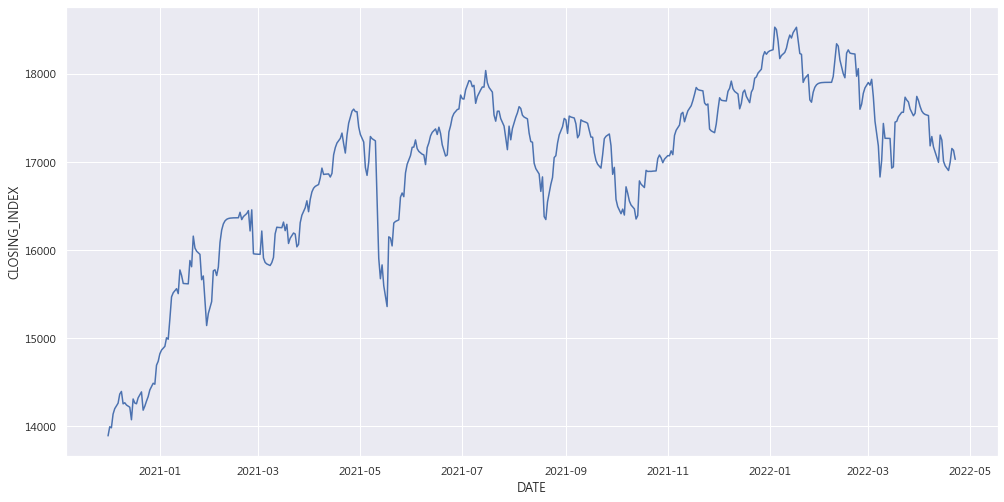

In [44]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
sns.lineplot(x='DATE', y='CLOSING_INDEX', data=stock_price)